In [145]:
%matplotlib inline

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [147]:
def clean_data(df: pd.DataFrame):
    df['animal'] = df[['cat', 'cow', 'dog', 'horse', 'sheep']].idxmax(axis=1).map({"cow": 0, "cat": 1, "dog": 2, "horse": 3, "sheep": 4})
    df.drop(columns=['cat', 'cow', 'dog', 'horse', 'sheep', 'id'], inplace=True)
    df = df[df.columns.drop(list(df.filter(regex='_v')))]
    df.drop(columns=["R_eye_x", "L_F_elbow_x", "L_B_elbow_x", "L_F_knee_x", "L_B_paw_x"], inplace=True)
    
    return df

In [148]:
x = pd.read_csv('x_train.csv')
y = pd.read_csv('y_train.csv')

In [149]:
print(f"NaN in x: {sum(list(x.isna().sum()))}")
print(f"NaN in y: {sum(list(y.isna().sum()))}")

NaN in x: 0
NaN in y: 0


In [150]:
x = clean_data(x)

/tmp/ipykernel_18780/25280846.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["R_eye_x", "L_F_elbow_x", "L_B_elbow_x", "L_F_knee_x", "L_B_paw_x"], inplace=True)


In [151]:
x.head()

,bounds_x,bounds_y,bounds_width,bounds_height,L_eye_x,L_eye_y,R_eye_y,L_ear_x,L_ear_y,R_ear_x,...,R_B_knee_x,R_B_knee_y,L_F_paw_x,L_F_paw_y,R_F_paw_x,R_F_paw_y,L_B_paw_y,R_B_paw_x,R_B_paw_y,animal
0,37,16,240,170,0,0,145,0,0,262,...,49,127,208,167,161,168,173,55,177,0
1,43,8,208,236,0,0,43,206,18,212,...,113,185,167,213,193,209,232,115,233,3
2,65,0,234,222,180,67,63,222,56,109,...,0,0,0,0,0,0,0,0,0,2
3,15,8,272,178,0,0,25,0,0,231,...,40,139,169,171,190,172,176,35,178,0
4,2,1,148,146,135,68,70,142,35,91,...,24,107,129,130,68,131,128,0,0,1


<AxesSubplot: >

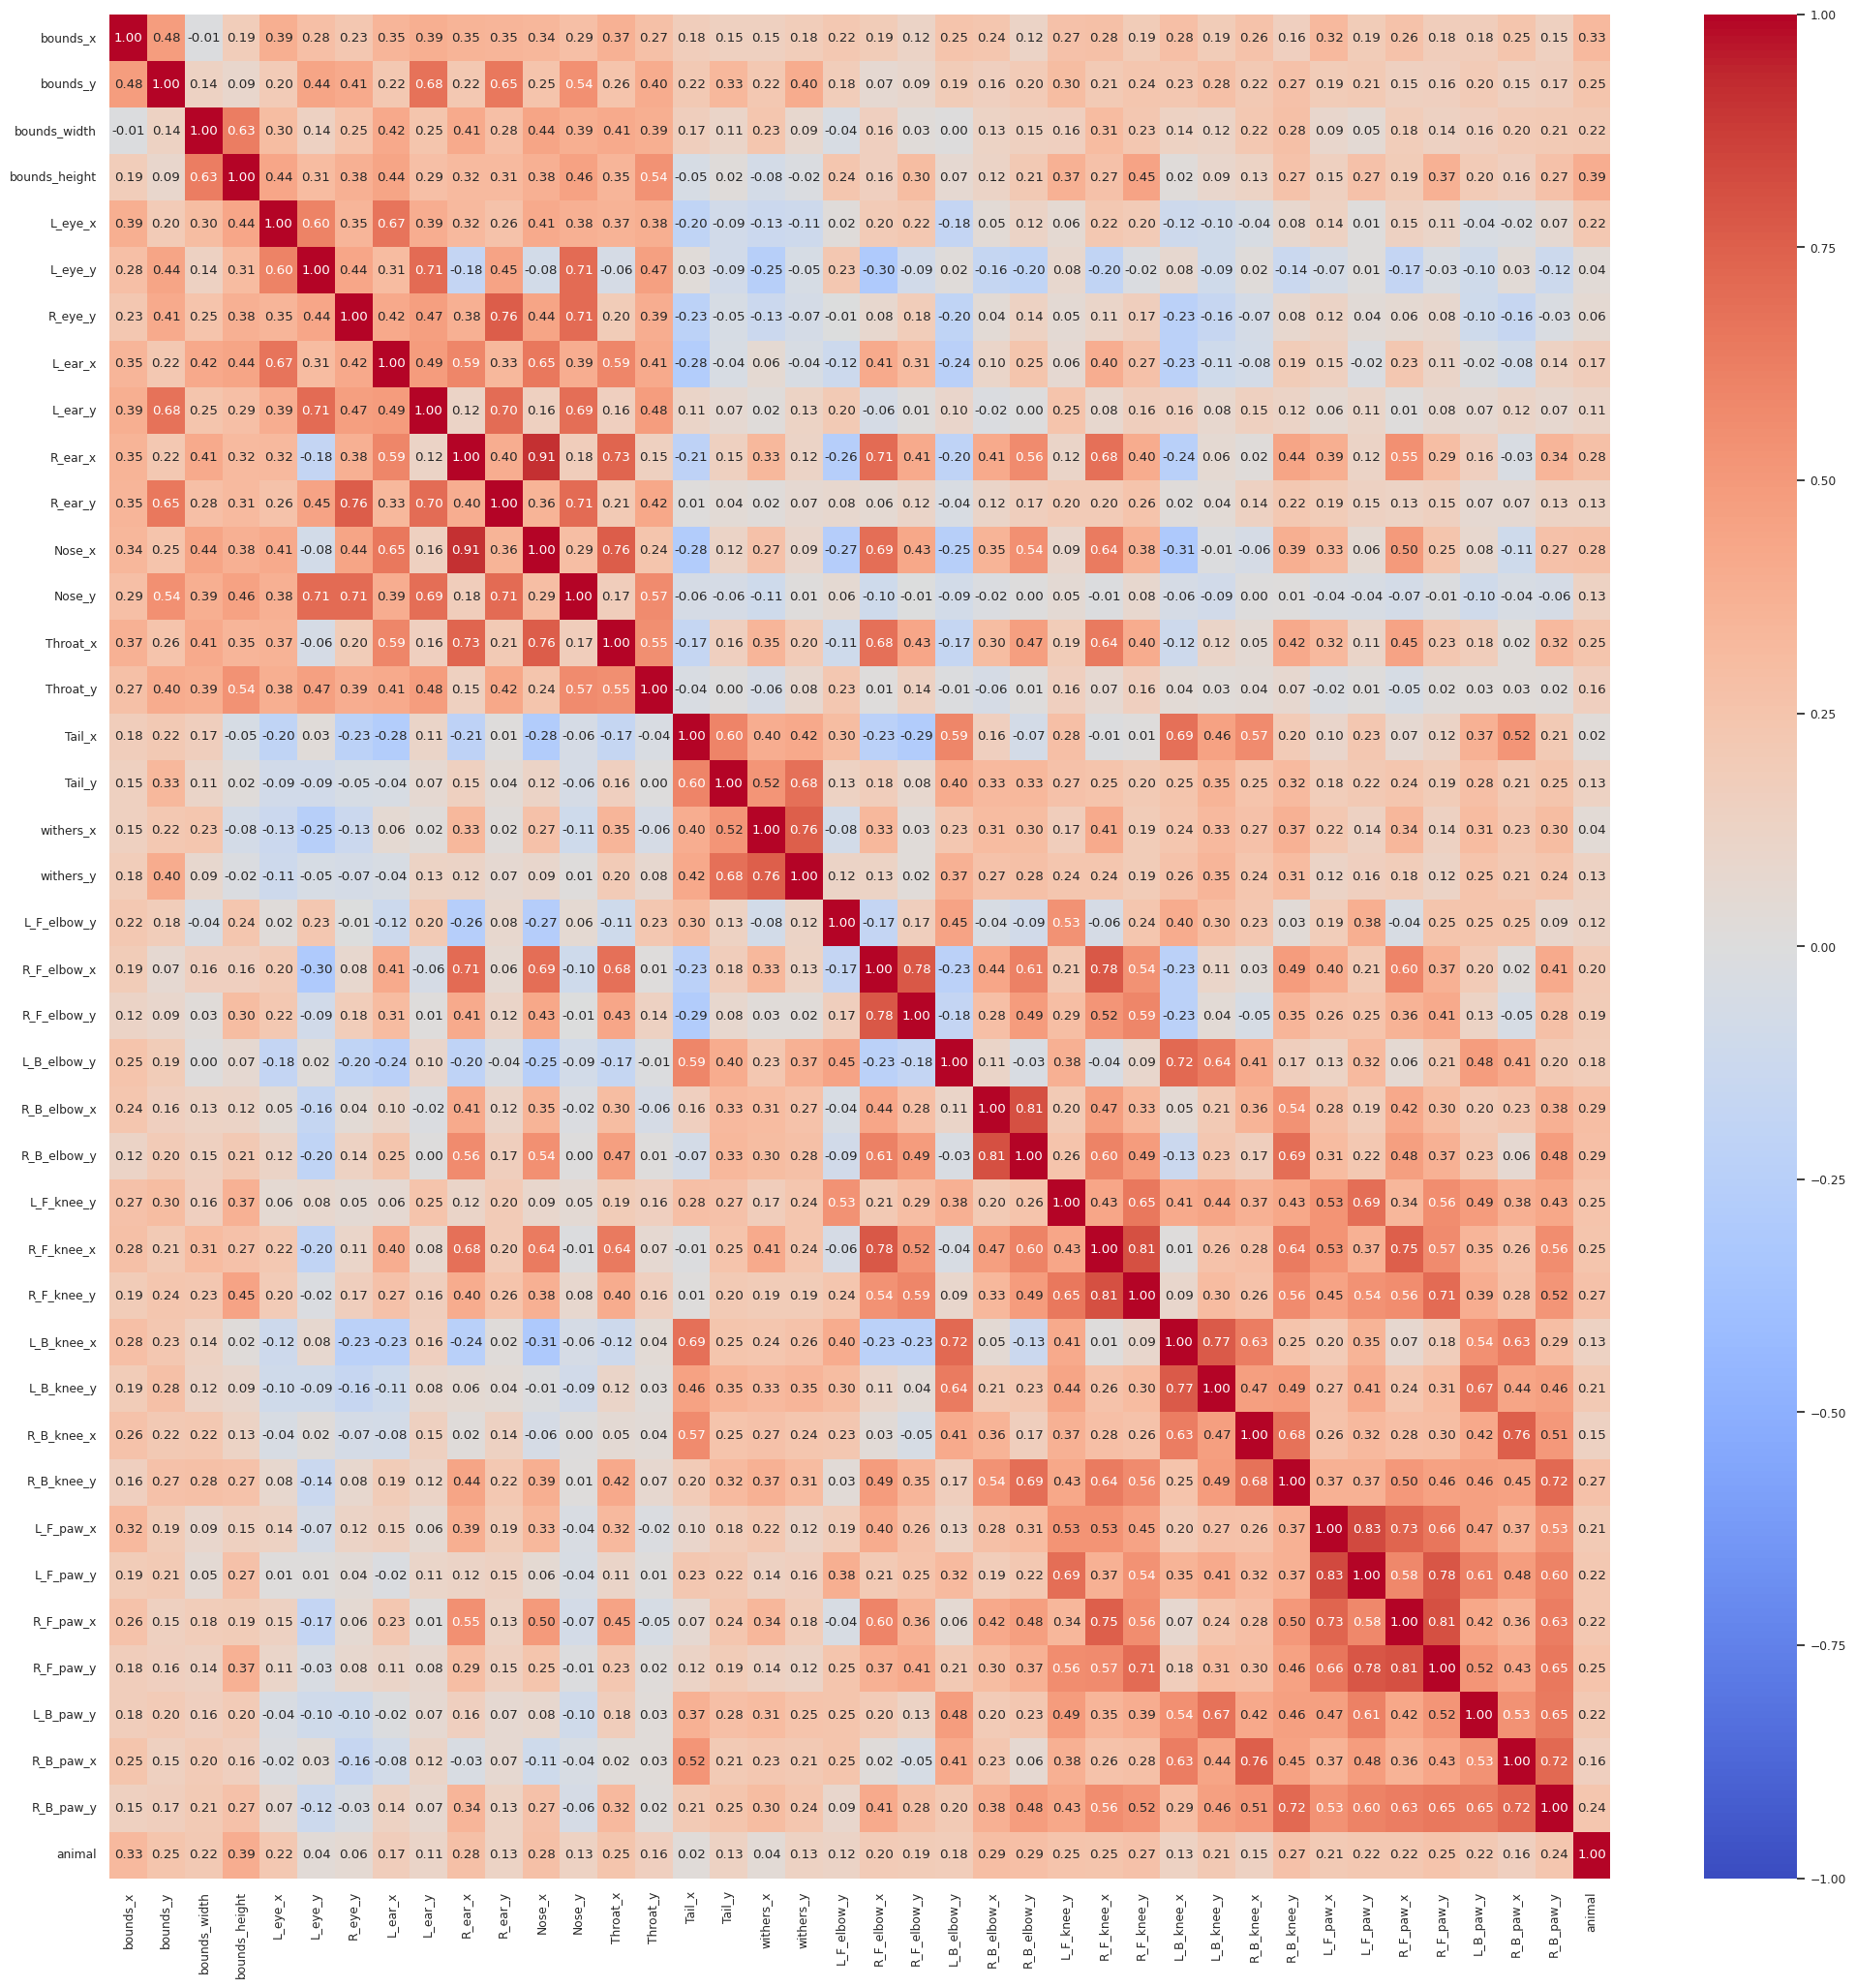

In [152]:
plt.figure(figsize=(25, 25))
sns.set(font_scale=0.8)
sns.heatmap(x.corr(), annot=True, fmt='.2f', cmap='coolwarm', vmax=1, vmin=-1)

In [153]:
y['action_type'] = y[['nothing', 'stand', 'sit', 'lie', 'go', 'run']].idxmax(axis=1).map({"nothing": 0, "stand": 1, "sit": 2, "lie": 3, "go": 4, "run": 5})
y.drop(columns=['nothing', 'stand', 'sit', 'lie', 'go', 'run', 'id'], inplace=True)

y.head()

,action_type
0,4
1,4
2,0
3,1
4,3


In [154]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=49)

## Решающее дерево

In [155]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(min_samples_split=6,random_state=99)
tree.fit(x_train, y_train)

y_pred = tree.predict(x_test)

print(f"Tree score: {f1_score(y_test, y_pred, average='micro')}")

Tree score: 0.5441176470588235


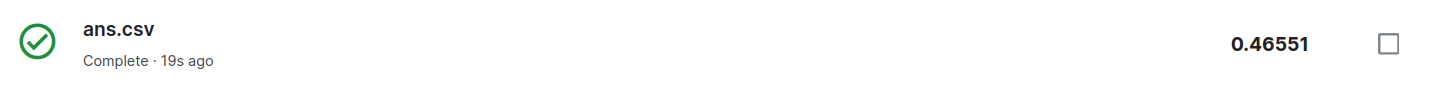

## Случайный лес

In [156]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000, max_depth=20, min_samples_split=6, random_state=99)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(f"Forest score: {f1_score(y_test, y_pred, average='micro')}")

/tmp/ipykernel_18780/1071684691.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


Forest score: 0.6764705882352942


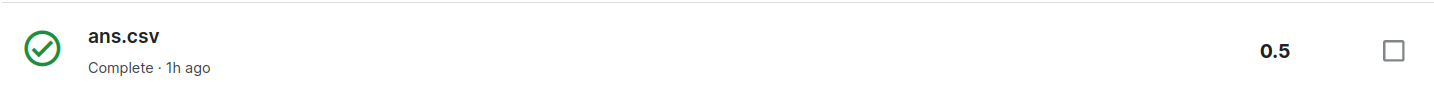

## Градиентный бустинг

In [157]:
from sklearn.ensemble import GradientBoostingClassifier

boost = GradientBoostingClassifier(n_estimators=1000, max_depth=20, min_samples_split=6, random_state=99)
boost.fit(x_train, y_train)

y_pred = boost.predict(x_test)

print(f"boost accuracy: {f1_score(y_test, y_pred, average='micro')}")

/home/yogeny/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


boost accuracy: 0.6544117647058824


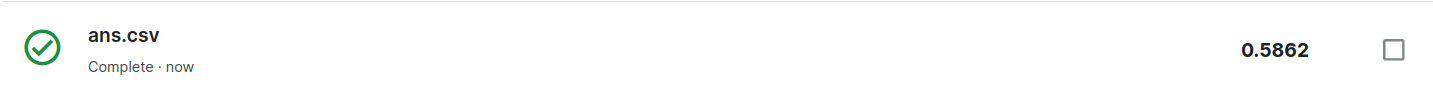

In [158]:
x_test = pd.read_csv('x_test.csv')
x_test_ids = x_test['id']
x_test = clean_data(x_test)
# x_test.drop(columns=columns_to_drop, inplace=True)

x_test.head()

/tmp/ipykernel_18780/25280846.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["R_eye_x", "L_F_elbow_x", "L_B_elbow_x", "L_F_knee_x", "L_B_paw_x"], inplace=True)


,bounds_x,bounds_y,bounds_width,bounds_height,L_eye_x,L_eye_y,R_eye_y,L_ear_x,L_ear_y,R_ear_x,...,R_B_knee_x,R_B_knee_y,L_F_paw_x,L_F_paw_y,R_F_paw_x,R_F_paw_y,L_B_paw_y,R_B_paw_x,R_B_paw_y,animal
0,59,30,234,156,83,57,58,84,41,75,...,250,136,88,179,141,177,172,255,169,3
1,73,2,170,174,0,0,109,230,82,224,...,82,139,231,171,158,161,152,105,152,1
2,1,8,180,242,125,91,77,171,59,86,...,52,181,141,234,83,231,0,52,200,1
3,19,6,226,160,0,0,42,236,22,228,...,68,132,0,0,205,140,163,50,162,3
4,0,2,297,296,201,109,110,279,60,41,...,0,0,0,0,0,0,0,0,0,0


In [159]:
model = DecisionTreeClassifier(criterion='gini', min_samples_split=6, random_state=42)
model.fit(x, y)

pred = model.predict(x_test)

ans = pd.DataFrame({'id': x_test_ids, 'label': pred})
ans.head(15)

,id,label
0,582,5
1,42,5
2,148,1
3,737,4
4,213,3
5,918,1
6,304,2
7,690,1
8,191,1
9,269,4


In [160]:
model = RandomForestClassifier(n_estimators=1000, max_depth=15, min_samples_split=6, random_state=42)
model.fit(x, y)

pred = model.predict(x_test)

ans = pd.DataFrame({"id": x_test_ids, "label": pred})
ans.head(15)

/tmp/ipykernel_18780/4114869054.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x, y)


,id,label
0,582,1
1,42,1
2,148,1
3,737,1
4,213,0
5,918,1
6,304,2
7,690,1
8,191,1
9,269,1


In [161]:
model = GradientBoostingClassifier(n_estimators=1000, max_depth=15, min_samples_split=6, random_state=54)
model.fit(x, y)

pred = model.predict(x_test)

ans = pd.DataFrame({"id": x_test_ids, "label": pred})
ans.to_csv("ans.csv", index=False)
ans.head(15)

/home/yogeny/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,id,label
0,582,5
1,42,1
2,148,1
3,737,5
4,213,0
5,918,1
6,304,2
7,690,1
8,191,1
9,269,1
